In [1]:
import joblib
import numpy as np
Subject_features = joblib.load('Subject_features.joblib')

In [2]:
TargetCol = []
for movement in range(15):
    for window in range(231):
        TargetCol.append(movement+1)

Target = np.array(TargetCol)

In [3]:
y = Target

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
# features_dict = {'S1': ..., ..., 'S8': ...}
# target_array = numpy array of shape (3465,)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers with StandardScaler in a pipeline
classifiers = {
    "RF": make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)),
    "SVM": make_pipeline(StandardScaler(), SVC(C=1.0,kernel='linear',random_state=42)),
    "ETC": make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state=42))
}

# Collect accuracy results
results = []

for subject_id, X in Subject_features.items():
    row = {"Subject": subject_id}
    for name, clf in classifiers.items():
        scores = cross_val_score(clf, X, Target, cv=kf, scoring='accuracy', n_jobs=-1)
        row[name] = np.mean(scores)
    results.append(row)



In [6]:
# Create DataFrame
accuracy_df_scaled = pd.DataFrame(results)
accuracy_df_scaled.set_index("Subject", inplace=True)

# Display
print(accuracy_df_scaled.round(4))
# accuracy_df.to_csv("normalized_classification_accuracy_all_subjects.csv")

             RF     SVM     ETC
Subject                        
S1       0.9792  0.9879  0.9841
S2       0.9743  0.9830  0.9847
S3       0.9304  0.9469  0.9449
S4       0.9732  0.9760  0.9812
S5       0.9879  0.9899  0.9934
S6       0.9830  0.9861  0.9905
S7       0.9913  0.9905  0.9948
S8       0.9608  0.9766  0.9734


In [7]:
joblib.dump(accuracy_df_scaled, 'Acc_with_HPT_norm.joblib')

['Acc_with_HPT_norm.joblib']

In [8]:
Fin_Result = joblib.load('Acc_with_HPT_norm.joblib')

In [9]:
Fin_Result.round(5)*100

,RF,SVM,ETC
Subject,,,
S1,97.922,98.788,98.413
S2,97.431,98.297,98.470
S3,93.045,94.690,94.488
S4,97.316,97.605,98.124
S5,98.788,98.990,99.336
S6,98.297,98.615,99.048
S7,99.134,99.048,99.481
S8,96.075,97.662,97.345


In [10]:
for col in Fin_Result.columns:
    print(f'Avg accuracy over all subjects ({col}) = {round(np.mean(Fin_Result[col]),5)}')

Avg accuracy over all subjects (RF) = 0.97251
Avg accuracy over all subjects (SVM) = 0.97962
Avg accuracy over all subjects (ETC) = 0.98088


We can see that Extra Tree Classifier gives the best overall accuracy.

In [11]:
# Cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
metrics_data = []

for subject, X in Subject_features.items():
    # Create pipeline
    pipeline = make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state=42))
    
    # Get predictions using cross-validation
    y_pred = cross_val_predict(pipeline, X, y, cv=kf, n_jobs=-1)
    
    # Compute metrics
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    
    metrics_data.append([subject, precision, recall, f1])

In [12]:
# Create DataFrame
metrics_df = pd.DataFrame(metrics_data, columns=['Subject', 'Precision', 'Recall', 'F1-Score'])
metrics_df.set_index('Subject')

,Precision,Recall,F1-Score
Subject,,,
S1,0.984272,0.984127,0.984081
S2,0.984999,0.984704,0.984769
S3,0.945967,0.944877,0.944786
S4,0.981483,0.981241,0.981275
S5,0.993396,0.993362,0.993349
S6,0.990475,0.990476,0.990440
S7,0.994807,0.994805,0.994799
S8,0.973445,0.973449,0.973404


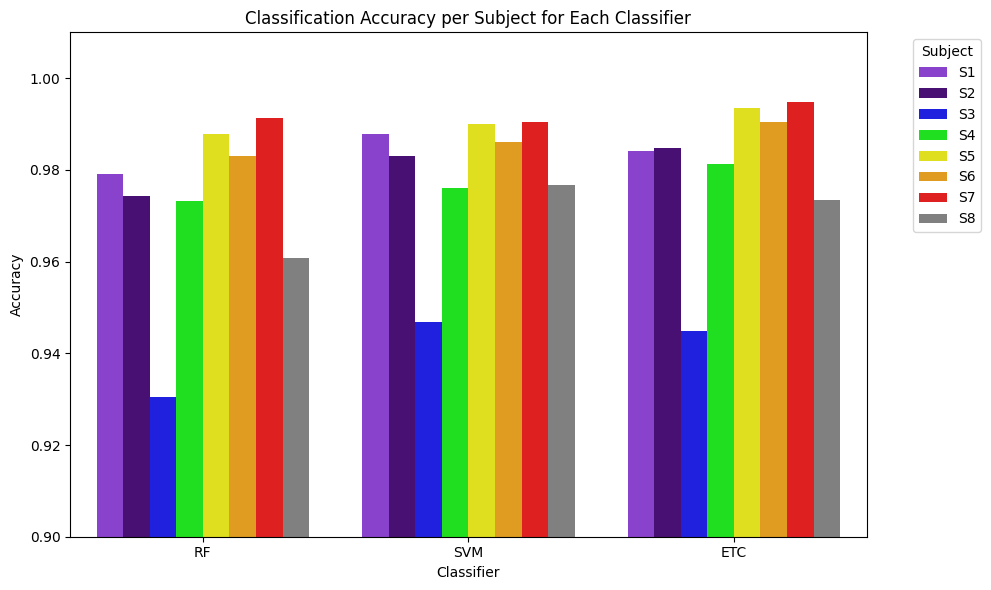

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    "Subject": ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"],
    "RF": [0.9792, 0.9743, 0.9304, 0.9732, 0.9879, 0.9830, 0.9913, 0.9608],
    "SVM": [0.9879, 0.9830, 0.9469, 0.9760, 0.9899, 0.9861, 0.9905, 0.9766],
    "ETC": [0.9841, 0.9847, 0.9449, 0.9812, 0.9934, 0.9905, 0.9948, 0.9734]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt for seaborn
df_melted = df.melt(id_vars=["Subject"], var_name="Classifier", value_name="Accuracy")

# Define VIBGYOR + Grey colors
vibgyor_colors = [
    "#8A2BE2",  # Violet
    "#4B0082",  # Indigo
    "#0000FF",  # Blue
    "#00FF00",  # Green
    "#FFFF00",  # Yellow
    "#FFA500",  # Orange
    "#FF0000",  # Red
    "#808080"   # Grey
]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Classifier", y="Accuracy", hue="Subject", data=df_melted, palette=vibgyor_colors)

# Customize
plt.title("Classification Accuracy per Subject for Each Classifier")
plt.ylabel("Accuracy")
plt.ylim(0.90, 1.01)
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Show plot
plt.savefig('AccOverSubjs')
plt.show()